In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart_disease_data.csv")
print("Dataset Shape", df.shape)
df.head()

Dataset Shape (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
print("Missing values:", df.isnull().sum().sum())
print(df['target'].value_counts())
print(f"balance: {df['target'].value_counts()[1] / df['target'].value_counts()[0]:.2f}:1")

Missing values: 0
target
1    165
0    138
Name: count, dtype: int64
balance: 1.20:1


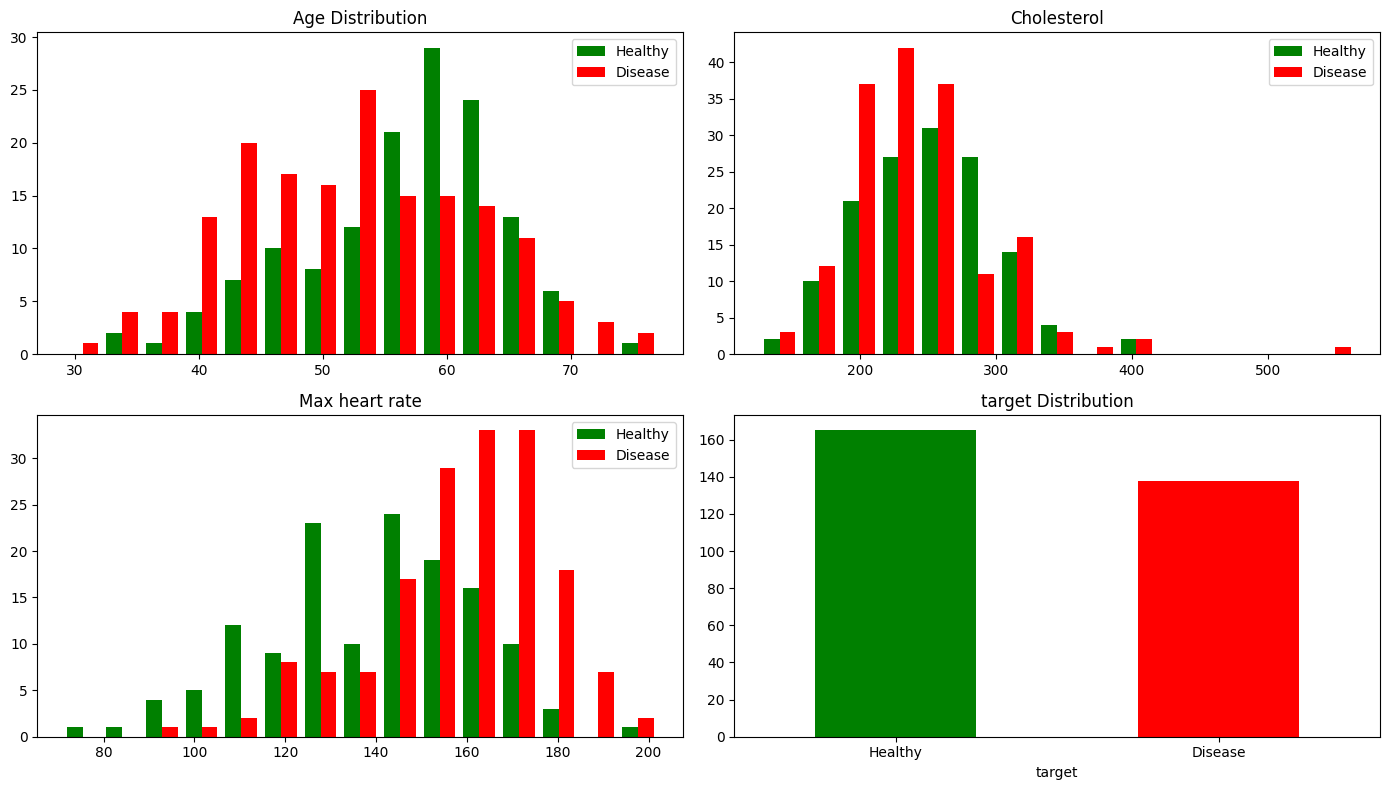

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14,8))

axes[0,0].hist([df[df['target']==0]['age'], df[df['target']==1]['age']],
                label=['Healthy','Disease'], bins=15, color=['green','red'])
axes[0, 0].set_title('Age Distribution')
axes[0,0].legend()

axes[0,1].hist([df[df['target']==0]['chol'], df[df['target']==1]['chol']],
                label=['Healthy','Disease'], bins=15, color=['green','red'])
axes[0,1].set_title('Cholesterol')
axes[0,1].legend()

axes[1,0].hist([df[df['target']==0]['thalach'], df[df['target']==1]['thalach']],
                label=['Healthy','Disease'], bins=15, color=['green','red'])
axes[1,0].set_title('Max heart rate')
axes[1,0].legend()

df['target'].value_counts().plot(kind='bar', ax=axes[1,1], color=['green','red'])
axes[1,1].set_title('target Distribution')
axes[1,1].set_xticklabels(['Healthy','Disease'], rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Feature Correlation heatmap',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()